In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Input
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
data_csv = pd.read_csv('C:/Users/gupta/Desktop/dotc/cb_ml/train.csv')       #reading MNIST data

In [4]:
data = data_csv[:10000].values       #10000 value gave pretty good accuracy

In [5]:
data = data[:,1:]/255.0              #normalise every column except 1st(label)

In [6]:
#test_train split
split = int(0.8*data.shape[0])                
X_train = data[:split]
Y_train = data[:split]

X_test = data[split:]
Y_test = data[split:]

In [7]:
#training a simple encrypter model

Encrypter = Sequential()
Encrypter.add( Dense(100, input_shape = (784,) ) )
Encrypter.add( Activation('sigmoid') )
Encrypter.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [8]:
#deploying a corresponding decrypter model
Decrypter = Sequential()
Decrypter.add( Dense(784, input_shape = (100,)) )
Decrypter.add( Activation('sigmoid') )
Decrypter.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


In [10]:
#concatenating it for training
Model = Sequential([Encrypter, Decrypter])
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 100)               78500     
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [11]:
#training dataset and validating
Model.compile(optimizer='adam', loss='mse')
Model.fit(X_train, Y_train, batch_size=10, epochs=30, validation_data=[X_test, Y_test],shuffle=True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 5s 648us/step - loss: 0.0607 - val_loss: 0.0450
Epoch 2/30
8000/8000 [==============================] - 4s 467us/step - loss: 0.0377 - val_loss: 0.0322
Epoch 3/30
8000/8000 [==============================] - 4s 516us/step - loss: 0.0284 - val_loss: 0.0255
Epoch 4/30
8000/8000 [==============================] - 4s 466us/step - loss: 0.0229 - val_loss: 0.0211
Epoch 5/30
8000/8000 [==============================] - 4s 473us/step - loss: 0.0191 - val_loss: 0.0180
Epoch 6/30
8000/8000 [==============================] - 4s 473us/step - loss: 0.0163 - val_loss: 0.0157
Epoch 7/30
8000/8000 [==============================] - 4s 480us/step - loss: 0.0142 - val_loss: 0.0140
Epoch 8/30
8000/8000 [==============================] - 4s 473us/step - loss: 0.0126 - val_loss: 0.0127
Epoch 9/30
8000/8000 [==============================] - 4s 483us/step - loss: 0.0114 - val_loss: 0.0115
Epoch 10/30
8000

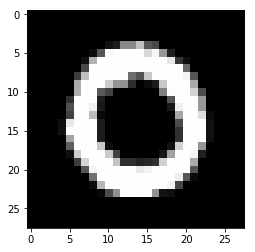

In [20]:
sample = X_train[1]          #selecting 1 image to test the result
our_input = np.reshape( sample*255, (28,28))
plt.imshow(  our_input, cmap = 'gray' )  #original image
plt.show()
inp = 'inp'
plt.imsave('./'+str(inp),our_input,cmap = 'gray')


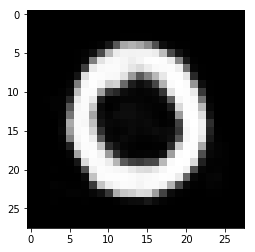

In [22]:
out = Model.predict( np.array([sample]) )             #final image after both encryption and decryption
out = np.array( out[0]*255, dtype=np.uint8 )          
plt.imshow( np.reshape(out, (28,28) ), cmap='gray' )
plt.show()
output = 'out'
plt.imsave('./'+ str(output), np.reshape(out, (28,28) ),cmap = 'gray')

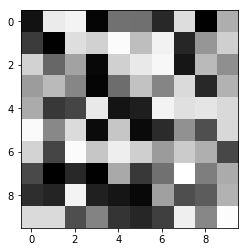

In [23]:
new = Encrypter.predict(np.array([sample]))           #displaying encrypted image
new = np.array( new[0]*255, dtype=np.uint8 )
plt.imshow( np.reshape(new, (10,10) ), cmap='gray' )
plt.show()
enc = 'encrypted'
plt.imsave('./' +str(enc) , np.reshape(new, (10,10) ), cmap='gray' )